__MNIST Dataset__

---


* 0 ~ 9의 글씨 데이터
* 28$\times$28 grayscale 이미지
* Train data : 60,000, Test data : 10,000  

<figure>
    <img src='https://images.deepai.org/custom-datasets/images/80c67fa1229744fdae147f18240ab04d/mnist.png' width=300 height=300>
</figure>
  

### Multi-Layer Perceptron

<figure>
<img src="https://www.kdnuggets.com/wp-content/uploads/deep-neural-network.jpg" width=400>
</figure>

<figure>
<img src="https://image.slidesharecdn.com/random-170910154045/95/-49-1024.jpg?cb=1505089848" width=1500>
</figure>

출처 : https://image.slidesharecdn.com/random-170910154045/95/-49-1024.jpg?cb=1505089848

참고 : https://hiddenbeginner.github.io/deeplearning/2019/09/22/optimization_algorithms_in_deep_learning.html

참고 : https://ganghee-lee.tistory.com/24

# Confusion Matrix

Confusion Matrix(오차 행렬) : Confusion Matrix는 이진 분류의 예측 오류가 얼마인지, 또 어떠한 유형의 예측 오류가 발생하고 있는지를 나타낸 지표

- True Positive(TP) : 정답이 P인데 모델도 P라고 예측한 경우
- True Negative(TN) : 정답이 N인데 모델도 N이라고 예측한 경우
- False Positive(FP) : 정답이 N인데 모델은 P라고 잘못 예측한 경우
- False Negative(FN) : 정답이 P인데 모델은 N이라고 잘못 예측한 경우


<figure>
<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F99DC064C5BE056CE106BC1" width=600>
</figure>

- Accuracy(정확도)
    - Accuracy는 가장 기본적인 분류 메트릭으로 (TP+TN) / (TP+TN+FP+FN)으로 계산
    - Accuracy는 모델이 얼마나 데이터를 잘 분류했느냐, 즉 분류 결과가 얼마나 True로 나왔느냐를 보여줌
    - 정확도는 일반적으로 분류 모델의 주요 평가 지표로 쓰이지만, 클래스의 비율이 불균형할 경우 신뢰도가 떨어진다는 단점
- Precision(정밀도)
    - Precision은 모델이 P라고 예측한 것 중에서 실제 얼마나 P를 맞췄는지를 나타내는 메트릭으로 TP / (TP+FP)으로 계산
    - Precision은 N인 데이터가 더 중요할 경우, 즉 실제로 N인 데이터를 P라고 판단하면 안 될 때 많이 사용
    - 스팸 메일을 분류할 때, 일반 메일(N)을 스팸 메일(P)로 잘못 분류하면 중요한 메일을 읽지 못하게 될 수 있음
- Recall(재현율)
    - Recall은 실제 P인 데이터 중에서 모델이 얼마나 P를 맞췄는지를 나타내는 메트릭으로 TP / (TP+FN)으로 계산
    - Recall은 P인 데이터가 더 중요할 경우, 즉 실제로 P인 데이터를 N이라고 판단하면 안 될 때 사용
    - 종양의 종류를 판단할 때, 악성 종양(P)을 음성 종양(N)으로 잘못 분류하면 생명이 위급해질 수 있음
- AUC : binary classificaion의 decision에 있어 얼마나 confidence가 정확한지 측정이 가능한 메트릭


- 평가 메트릭의 선택
    - 평가 메트릭은 주어진 문제나 문제를 풀어서 해결하고자 하는 목표에 따라 적절하게 선택해야 함

**참고하면 좋을 블로그(https://velog.io/@crescent702/%EB%B2%88%EC%97%AD-Evaluation-Metrics-for-Machine-Learning-Models)

## Convolutional Neural network

- MNIST
- Fashion MNIST
- cifar 10
- cifar 100

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28,28,1)

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


데이터를 로딩합니다!


데이터 image data -> (R+G+B) / 3-> 0~ 255숫자-> 픽셀

픽셀-> 딥러닝-> 0$~$255까지의 숫자가 너무 큼.->normlization (0~1로 바꿔줌)

In [ ]:
X_train = X_train.astype('float32') / 255 #가장 큰 수로 나눠주면 ->가장 큰값 1 image >0 ->0~1로 됨.
#image<0 -> X_ray or CT or MRI(-1000 ~ 1000)
X_test = X_test.astype('float32') / 255

In [ ]:
X_train.shape

(60000, 28, 28)

(60000 : image 갯수) 28 : row / 28:col

In [ ]:
X_train = X_train.reshape(X_train.shape[0],28,28,1) # X_train.shape[0] : image 수,28*28*1 reshape을 하겠다.
X_test = X_test.reshape(X_test.shape[0],28,28,1) #(B,W,H,C)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten
from tensorflow.keras.models import Sequential
model =  Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten()) #쭉 펼쳐주기.
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model = keras.Sequential([
                          layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape = (28, 28, 1)),
                                        layers.MaxPooling2D(pool_size=(2,2)),
                                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2,2)),
                                        layers.Flatten(),
                                        layers.Dropout(0.5), #가지치기 0.5비율로 랜덤하게 가지치기
                                        #파라미터가 많아서.
                                        layers.Dense(num_classes,activation='softmax') #num_classes = 10
                                        ])

In [ ]:
import time

start_time = time.time()
batch_size = 512
epoch =30
model.compile(loss='sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
hist = model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)
print(f'Fit time:{time.time() - start_time}')

Epoch 1/30
106/106 [==============================] - 10s 14ms/step - loss: 0.7308 - accuracy: 0.7920 - val_loss: 0.1540 - val_accuracy: 0.9575
Epoch 2/30
106/106 [==============================] - 1s 11ms/step - loss: 0.1686 - accuracy: 0.9501 - val_loss: 0.0905 - val_accuracy: 0.9755
Epoch 3/30
106/106 [==============================] - 1s 12ms/step - loss: 0.1161 - accuracy: 0.9655 - val_loss: 0.0723 - val_accuracy: 0.9802
Epoch 4/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0946 - accuracy: 0.9708 - val_loss: 0.0625 - val_accuracy: 0.9835
Epoch 5/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0791 - accuracy: 0.9757 - val_loss: 0.0524 - val_accuracy: 0.9848
Epoch 6/30
106/106 [==============================] - 1s 12ms/step - loss: 0.0704 - accuracy: 0.9789 - val_loss: 0.0476 - val_accuracy: 0.9885
Epoch 7/30
106/106 [==============================] - 1s 11ms/step - loss: 0.0641 - accuracy: 0.9797 - val_loss: 0.0439 - val_accuracy: 0.987

<function matplotlib.pyplot.show(*args, **kw)>

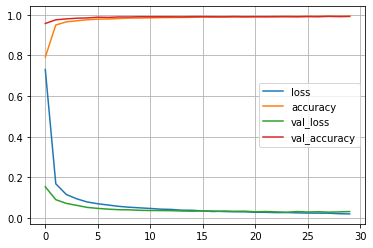

In [ ]:
import matplotlib.pyplot as plt

plot_target = ['loss','accuracy','val_loss','val_accuracy']
plt.figure()
for each in plot_target:
    plt.plot(hist.history[each],label=each)
plt.legend()
plt.grid()
plt.show

## Test

In [ ]:
score = model.evaluate(X_test,y_test)
print(f'Test Loss : {score[0]}')
print(f'Test Accuracy : {score[1]}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9915
Test Loss : 0.026418715715408325
Test Accuracy : 0.9915000200271606


## 데이터 예측

In [ ]:
import numpy as np
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result,axis=1)
predicted_labels[:10]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

## 틀린 데이터 모으기

In [ ]:
wrong_result = []
for n in range(0,len(y_test)):
    if predicted_labels[n] !=y_test[n]:
        wrong_result.append(n)
len(wrong_result)

85

## 틀린 데이터 16개만 직접 그려보기

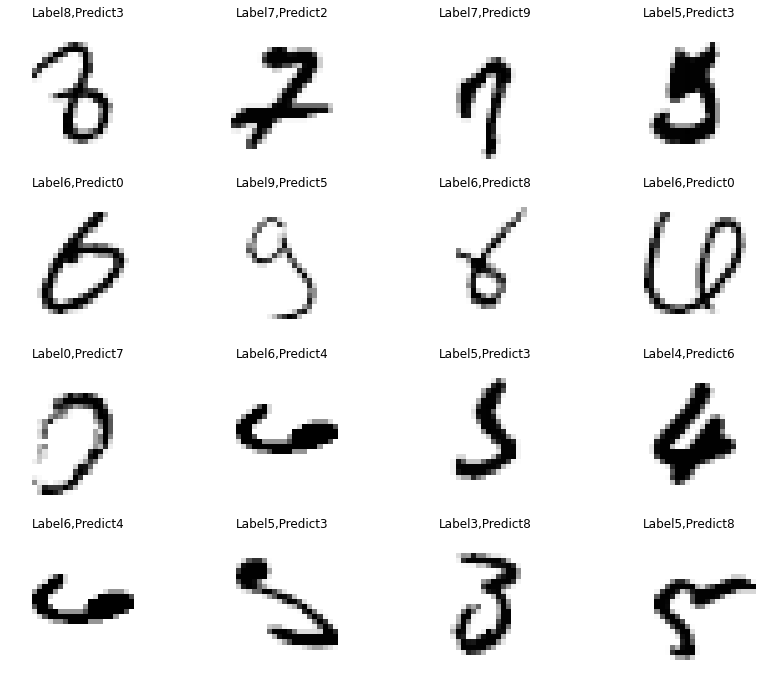

In [ ]:
import random

samples = random.choices(population = wrong_result,k=16)

plt.figure(figsize=(14,12))

for idx,n in enumerate(samples):
    plt.subplot(4,4,idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap = 'Greys',interpolation='nearest')
    plt.title('Label' +str(y_test[n]) + ',Predict'+ str(predicted_labels[n]))
    plt.axis('off')
plt.show()

### MNIST with class

In [ ]:
import keras
keras.__version__

'2.13.1'

In [ ]:
from keras import layers,models
class CNN(models.Sequential):
    def __init__(self, input_shape, num_classes):
        super().__init__()
        self.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
        self.add(layers.Conv2D(64, (3, 3), activation='relu'))
        self.add(layers.MaxPooling2D(pool_size=(2, 2)))
        self.add(layers.Dropout(0.25))
        self.add(layers.Flatten())
        self.add(layers.Dense(128, activation='relu'))
        self.add(layers.Dropout(0.5))
        self.add(layers.Dense(num_classes, activation='softmax'))

        self.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer='rmsprop',
                      metrics=['accuracy'])

In [ ]:
# Dataset 준비
from tensorflow import keras
from keras import datasets
from keras import backend

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        #Pytorch 계열
        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        # Tensorflow 계열
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)

        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [ ]:
import matplotlib.pyplot as plt
def plot_acc(history, title=None, show_flag=False):
    # summarize history for accuracy
    if not isinstance(history, dict): #isinstance : 파이썬 자료형을 확인하는 것.
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accracy')
    plt.legend(['Training', 'Validation'], loc=0)
    if show_flag:
        plt.show()
def plot_loss(history, title=None, show_flag=False):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Training', 'Validation'], loc=0)
    if show_flag:
        plt.show()


def plot_history(history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plot_acc(history)
    plt.subplot(1, 2, 2)
    plot_loss(history)

def plot_loss_acc(history):
    plot_loss(history, '(a) Loss trajectory')
    plt.show()
    plot_acc(history, '(b) Accuracy trajectory')
    plt.show()
def plot_acc_loss(history):
    plot_acc(history, '(a) Accuracy trajectory')
    plt.show()
    plot_loss(history, '(b) Loss trajectory')
    plt.show()

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/10
375/375 [==============================] - 20s 11ms/step - loss: 0.2664 - accuracy: 0.9173 - val_loss: 0.0653 - val_accuracy: 0.9808
Epoch 2/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0906 - accuracy: 0.9730 - val_loss: 0.0464 - val_accuracy: 0.9868
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0680 - accuracy: 0.9797 - val_loss: 0.0428 - val_accuracy: 0.9873
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0439 - val_accuracy: 0.9873
Epoch 5/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0446 - accuracy: 0.9867 - val_loss: 0.0347 - val_accuracy: 0.9895
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 0.0417 - accuracy: 0.9872 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 0.037

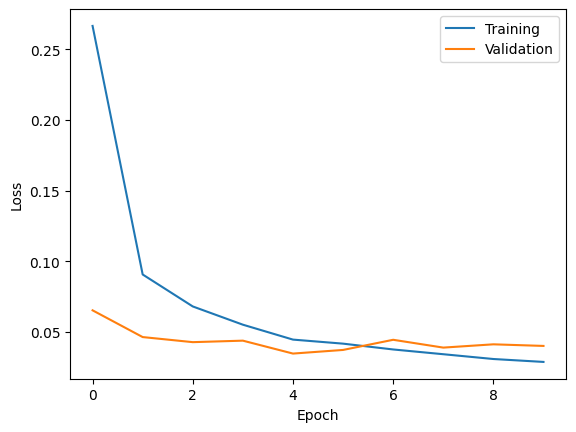

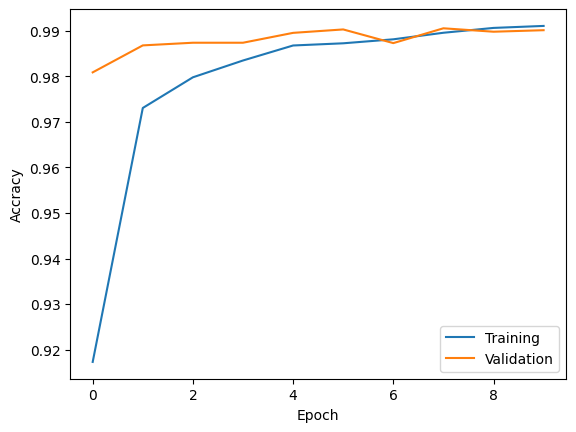

In [ ]:
batch_size = 128
epochs = 10

data = DATA()
model = CNN(data.input_shape, data.num_classes)

history = model.fit(data.x_train, data.y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2)

score = model.evaluate(data.x_test, data.y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

### Dropout

- 신경망이 지니고 있는 단점인 과적합과 Gradient Vanishing을 완화시킬 수 있는 알고리즘.  

- 신경망의 학습 과정 중 Layer의 노드를 랜덤하게 Drop함으로써 Generalization 효과를 가져오게 하는 테크닉.  

-  경험적으로 합성곱 신경망의 전결합층에 적용하는 것이 효과가 좋다고 알려져 있다.

[방법]   
  Input layer의 Column에 랜덤하게 0을 넣음.   
  Weight Matrix에 랜덤하게 일부 Column에 0을 집어넣어 연산.
<figure>
<img src='https://miro.medium.com/max/1044/1*iWQzxhVlvadk6VAJjsgXgg.png' width=500>
</figure>

### Batch Normalization

* Internal Covariate Shift
 : 네트워크의 학습 도중에 파라미터의 변화로 인한 네트워크 Activation(출력)들의 분포 변화
* 기존의 여러 연구 결과들은 입력값들이 Whitening된다(zero Mean & Unit Variance)면, 뉴럴넷이 훨씬 빠르게 수렴할 것이라고 말하고 있다.
* 이러한 방법은 Gradient Descent Step의 효과를 줄이는 결과를 초래
* 또한 Backpropagation 방법도 복잡함
* Mini batch 단위로 다음을 수행.  
$BN(x;\gamma,\beta)=\beta+\gamma\dfrac{x-E(x)}
{\sqrt{Var(x)+\epsilon}}$
* BN은 학습 속도를 향상시켜주고 Gradient Vanishing 문제도 완화시켜줌.
* 자세한 내용(https://hcnoh.github.io/2018-11-27-batch-normalization)

### Loss function

Multi-class classification에서 많이 사용되는 softmax -> cross entropy loss

<figure>
<img src='https://miro.medium.com/max/738/1*z5zL8kz7TPW1y3okAjuvBA.jpeg' width=500>
</figure>

### PyTorch의 장점
1. Python의 인기있는 라이브러리 패키지를 사용하여 Python에서 신경망 레이어를 쉽게 작성 가능.
2. 그래프 계산을 위한 동적 접근: Tensorflow의 딥러닝 프레임워크는 전산 그래프를 미리 작성해야 하는 정적 그래프에서 작동. 계산식을 임의로 표현한 후에 GPU로 전송하여 블랙박스처럼 처리. 그러나 PyTorch 같은 동적 접근 방식에서는 모든 계산과 진행 단계를 완벽하게 파악할 수 있음.   

<figure>
<img src='https://mblogthumb-phinf.pstatic.net/MjAxNzA2MTRfNDcg/MDAxNDk3NDM5NzU1NTU2.bWThN8_GorrSIE1xSivP_sgdUTMRCJa1d-N9XyXj7TYg.BJq2bPkpUjRlpwINTgM27PvdkgkuDTvzb8HdQZzA0agg.PNG.fastcampus/sdfads.PNG?type=w800'>
</figure>

3. PyTorch 코드를 자유롭게 디버깅할 수 있는 Python 디버그 도구 사용 가능.
4. Torch.nn.DataParallel을 사용하여 모듈 래핑. 여러 GPU를 쉽게 사용할 수 있도록 해줌.
5. Auto-grad : backward()를 통해 모든 변수의 grad를 바로 계산.  
tesnsorflow에도 tf.gradient라는 자동 gradient 계산함수가 있지만 이것은 x.grad, y.grad = tf.gradient(c,[x,y,z]) 라고 선언하여 정의한 뒤, tf.Session을 이용해서 실제 계산까지도 해야 함.

### Fashion MNIST

#### 모델 구성하기

Fashion-MNIST ready~


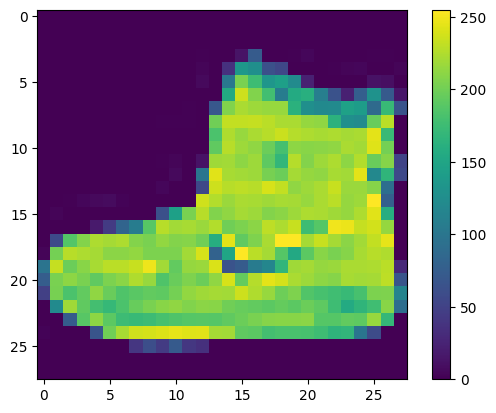

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

#라벨링을 미리 해둠.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

# 0 ~ 1 범위로 만듭니다.
x_train = x_train / 255.0
x_test = x_test / 255.0

# from tensorflow.keras.utils import to_categorical
# # 각 데이터의 레이블을 범주형 형태로 변경합니다.
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# # 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.3, random_state = 777)
print('Fashion-MNIST ready~')

#### 모델 구성하기

- filters : 몇 개의 다른 종류의 필터를 활용한 것인지를 나타냄. 출력 모양의 깊이(depth)를 결정함.
- kernel_size : 연산을 수행할 때 윈도우의 크기를 의미.
- stride : 연산을 수행할때 윈도우가 가로 그리고 세로로 움직이면서 내적 연산을 수행하는데, 한 번에 얼마나 움직일지를 의미.

In [ ]:
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D, Dense, Flatten, BatchNormalization

np.random.seed(487)

model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = 3,strides = (1,1), padding ='same', activation = 'relu', input_shape = (28,28,1)))
# model.add(Conv2D(filters = 16, kernel_size = 3,strides = (1,1), padding ='valid', activation = 'relu', input_shape = (28,28,1)))
# model.add(Conv2D(16,(3,3),padding="same" or valid(default), strides=(1, 1)(default) activation = 'relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides=2, padding = 'valid'))
model.add(Conv2D(filters = 32, kernel_size = 3,strides = (1,1), padding ='same', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2), strides=2, padding = 'same'))
model.add(Conv2D(filters = 32, kernel_size = 3,strides = (1,1), padding ='same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=2, padding = 'same'))
model.add(Flatten()) # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
model.add(Dense(64, activation = 'relu')) #Fully Connecteced
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,BatchNormalization

# 이전과 다르게 리스트 형태로 층을 구성해볼 수 있습니다.
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), #widthXheightXChannel
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), #maxpooing에서 반절이 줄어듬
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'), #Depth를 늘림.
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'),
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 16)        64        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 batch_normalization_3 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                      

#### 모델 학습하기

In [ ]:
!pip install jupyter-tensorboard

만약 이코드가 없으면 loss = 'sparse_categorical_crossentropy'로 바뀌어야 함.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime
import tensorflow as tf

# 학습데이터의 log를 저장할 폴더 생성 (지정)
log_dir = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# 텐서보드 콜백 정의 하기
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc'])
# model.fit(x_train, y_train, epochs = 100, validation_data=(x_val,y_val))
train_model = model.fit(x_train, y_train, epochs = 50, batch_size  = 32, validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/50
1182/1182 [==============================] - 20s 11ms/step - loss: 0.4291 - acc: 0.8435 - val_loss: 0.3215 - val_acc: 0.8783
Epoch 2/50
1182/1182 [==============================] - 13s 11ms/step - loss: 0.2883 - acc: 0.8927 - val_loss: 0.3141 - val_acc: 0.8783
Epoch 3/50
1182/1182 [==============================] - 7s 6ms/step - loss: 0.2415 - acc: 0.9113 - val_loss: 0.3576 - val_acc: 0.8802
Epoch 4/50
1182/1182 [==============================] - 7s 6ms/step - loss: 0.2140 - acc: 0.9201 - val_loss: 0.2589 - val_acc: 0.9031
Epoch 5/50
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1887 - acc: 0.9288 - val_loss: 0.3017 - val_acc: 0.8981
Epoch 6/50
1182/1182 [==============================] - 7s 6ms/step - loss: 0.1685 - acc: 0.9366 - val_loss: 0.2944 - val_acc: 0.9007
Epoch 7/50
1182/1182 [==============================] - 6s 5ms/step - loss: 0.1497 - acc: 0.9438 - val_loss: 0.2932 - val_acc: 0.9002
Epoch 8/50
1182/1182 [==============================] - 7s

In [ ]:
!pip install -U tensorboard

In [ ]:
%load_ext tensorboard

In [ ]:
#텐서보드에서 notebook import

from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir logs/my_board/20230918-061626 (started 0:04:18 ago; pid 7278)


In [ ]:
#텐서보드 불러오기
!tensorboard dev upload \
  --logdir {log_dir} \
  --name "(My latest experiment" \
  --one_shot

2023-09-18 06:30:53.483948: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

logs/my_board/20230918-061626

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

To sign in with the TensorBoard uploader:

1. On your computer or phone, visit:

   https://www.google.com/device

2. Sign in with your Google account, then enter:

   YRP-YNM-GBP



New experiment created. View your TensorBoard at: https://tensor

# sparse_categorical_crossentropy 를 쓰려면 원핫 인코딩으로 바꾸면 안된다. 라벨 인코딩을 바로 받아들여 sparse하게 받아들이기 때문에, 에러가 남

# to_categorical 하게 바꾼다음에 작동시킬려면 categorical_crossentropy로 써야 함.

#### plot_model 함수를 사용합니다

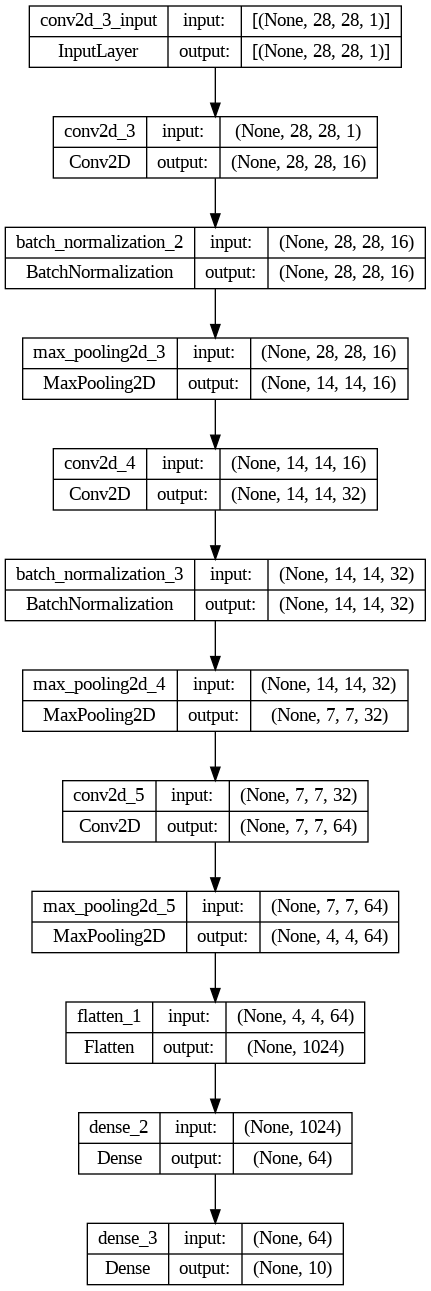

In [ ]:
# 각주의 해결 방법을 써도 통하지 않는 다면, 다음 코드의 주석을 풀어 실행시키세요.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

#정확도 평가

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test,verbose=1) #verbose=0 결과 생략 verbose = 1 : progress bar / verbose=2 : 결과만

313/313 [==============================] - 1s 3ms/step - loss: 0.7796 - acc: 0.9036


##  예측하기

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.08533674,
       0.08533674, 0.08533674, 0.08533674, 0.08533674, 0.2319693 ],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
np.argmax(y_test[0])

0

# 학습결과 plot

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

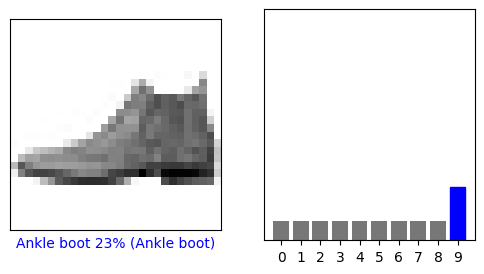

In [ ]:
%matplotlib inline
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

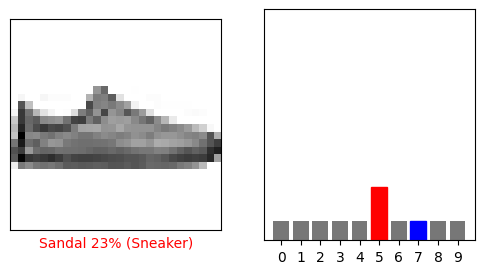

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i],y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

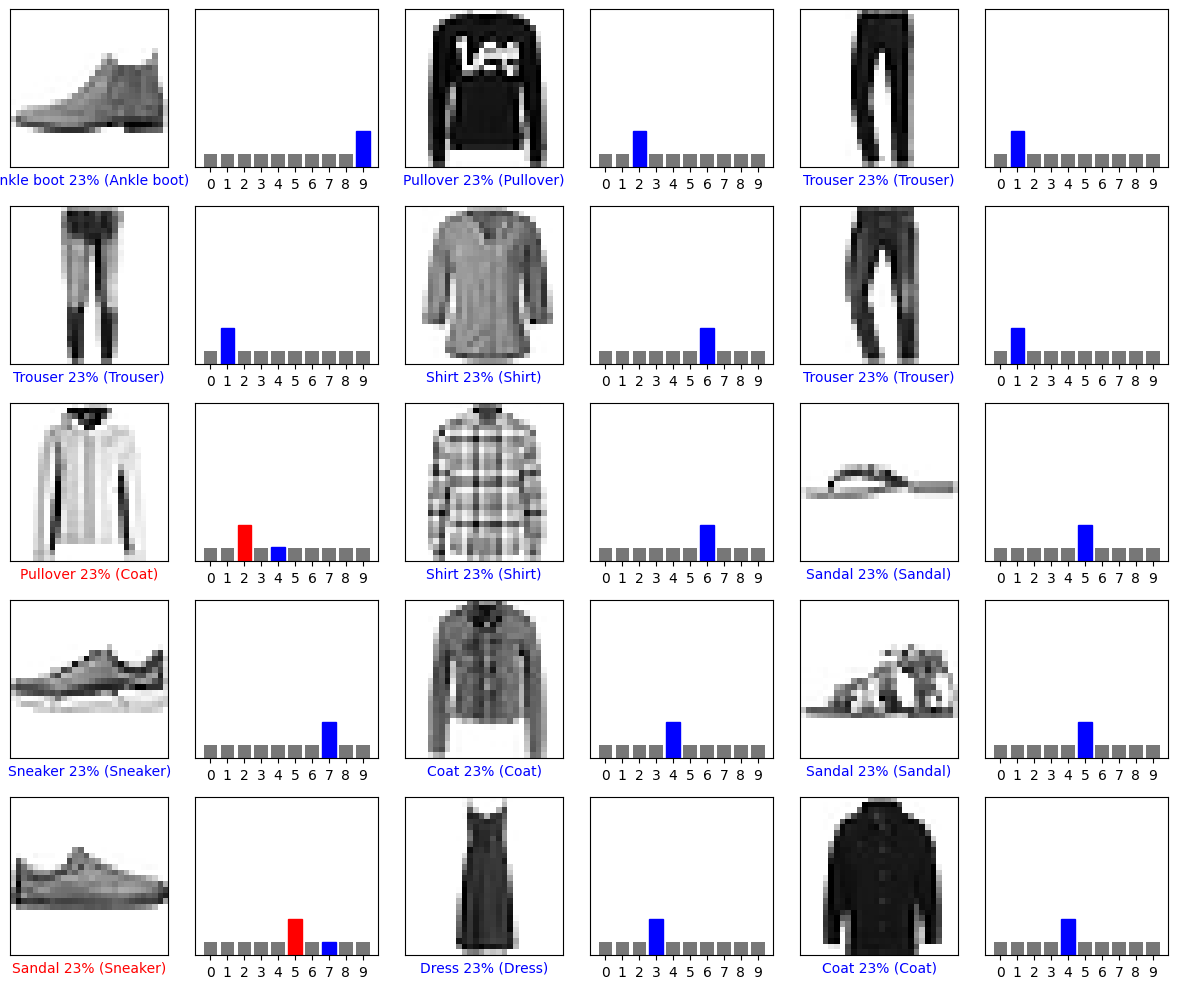

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

## LeNet-5

<img src='https://t1.daumcdn.net/cfile/tistory/99170D4C5C7E21250E'>|

- CNN을 처음으로 개발한 얀 르쿤(Yann Lecun)연구팀이 1998년에 개발한 CNN
알고리즘의 이름.
- Gradient-based learning applied to document recognition


1) C1 layer : 입력 영상(여기서는 32X32 사이즈의 이미지)을 6개의 5X5 필터와 컨볼루션 연산을 해줌. 그 결과 6장의 28X28 특성 맵을 얻게 됨.

- 훈련해야 될 파라미터의 개수 : (가중치$\times$ 입력맵 개수+바이어스)*특성맵 개수 = (5$\times$ 5 $\times$ 1+1)$\times$6 = 156

2) S2 layer : 6장의 28X28 특성 맵에 대해 서브샘플링을 진행함. 결과적으로 28X28 사이즈의 특성 맵이 14X14 사이즈의 특성맵으로 축소 됨.
- 2X2 필터를 stride 2로 설정해서 서브샘플링을 해줌. 사용하는 서브샘플링 방법은 average pooling

 - 훈련해야 될 파라미터의 개수 : (가중치+바이어스)*특성맵 개수 = (1+1)$\times$6 = 12

 - 왜 평균 풀링을 사용을 하였는가 ? 논문에 의하면 평균을 낸 다음에 한 개의 훈련 가능한 가중치(trainable wight)를 곱해주고 또 한 개의 훈련가능한 바이어스(trainable bias)를 더해준다고 한다. 그 값이 시그모이드 함수를 통해 활성화 됨. 그 가중치와 바이어스는 시그모이드의 비 활성도를 조절해줌.

3) C3 레이어: 6장의 14 x 14 특성맵에 컨볼루션 연산을 수행해서 16장의 10 x 10 특성맵을 산출해낸다.

- 6장의 14 x 14 특성맵에서 연속된 3장씩을 모아서 5 x 5 x 3 사이즈의 필터와 컨볼루션 해준다(그림2에서 열0-5). 6장의 10 x 10 특성맵이 산출된다.

- 또한 6장의 14 x 14 특성맵에서 연속된 4장씩을 모아서 5 x 5 x 4 사이즈의 필터와 컨볼루션 해준다(그림2에서 열6-11). 6장의 10 x 10 특성맵이 산출된다.

- 또한 6장의 14 x 14 특성맵에서 불연속한 4장씩을 모아서 5 x 5 x 4 사이즈의 필터와 컨볼루션 해준다(그림2에서 열12-14). 3장의 10 x 10 특성맵이 산출된다.  

- 마지막으로 6장의 14 x 14 특성맵 모두를 가지고 5 x 5 x 6 사이즈의 필터와 컨볼루션 해준다(그림2에서 열15). 1장의 10 x 10 특성맵이 산출된다.

- 결과적으로 16장(6 + 6 + 3 + 1)의 10 x 10 특성맵을 얻게 되었다.

<img src='https://t1.daumcdn.net/cfile/tistory/9902AD375C7F2B3E1A'>

훈련해야할 파라미터 개수:

첫번째그룹=> (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*3 + 1)*6 = 456

두번째그룹=> (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*4 + 1)*6 = 606

세번째그룹=> (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*4 + 1)*3 = 303

네번째그룹=> (가중치*입력맵개수+바이어스)*특성맵 개수 = (5*5*6 + 1)*1 = 151

456 + 606 + 303 + 151 = 1516

4) S4 레이어: 16장의 10 x 10 특성 맵에 대해서 서브샘플링을 진행해 16장의 5 x 5 특성 맵으로 축소시킨다.

훈련해야할 파라미터 개수: (가중치 + 바이어스)*특성맵개수 = (1 + 1)*16 = 32

5) C5 레이어: 16장의 5 x 5 특성맵을 120개 5 x 5 x 16 사이즈의 필터와 컨볼루션 해준다. 결과적으로 120개 1 x 1 특성맵이 산출된다.

훈련해야할 파라미터 개수: (가중치*입력맵개수 + 바이어스)*특성맵 개수 = (5*5*16 + 1)*120 = 48120

6) F6 레이어: 84개의 유닛을 가진 피드포워드 신경망이다. C5의 결과를 84개의 유닛에 연결시킨다.

훈련해야할 파라미터 개수: 연결개수 = (입력개수 + 바이어스)*출력개수 = (120 + 1)*84 = 10164

7) 아웃풋 레이어: 10개의 Euclidean radial basis function(RBF) 유닛들로 구성되어있다. 각각 F6의 84개 유닛으로부터 인풋을 받는다. 최종적으로 이미지가 속한 클래스를 알려준다.



LeNet-5를 제대로 가동하기 위해 훈련해야할 파라미터는 총 156 + 12 + 1516 + 32 + 48120 + 10164 = 60000개다.

- 풀링층은 중요한 특징은 유지하면서 해상도를 떨어뜨리는 효과를 갖음.
    - 풀링과 스트라이드를 사용하는 주 목적은 신경망의 파라미터 수를 줄이는 것. -> 계산량이 많아지므로
    - 합성곱층의 스트라이드와 패딩을 잘 조절하면 풀링이 불필요하다는 의견도 많음.
    - 논문 [Starving for Simplicity : The All convolutional net]  에서는 풀링층을 완전히 배제하고 합성곱층만을 사용해서 합성곱 신경망을 제시한다.
    - 이 논문의 저자는 표현의 크기를 줄일 수 있도록 중간 중간 스트라이드를 크게 설정한 합성곱층을 배치하면 된다고 설명함.
    - 구조(아키텍쳐)에서 적은 수의 풀링층만을 사용하거나 아예 사용하지 않을 가능성이 높다. 현재는 합성곱층 사이에 이미지 다운샘플링을 위한 풀링층을 배치하는 것이 일반적이다.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D, Flatten,Dense

model = Sequential() #비어 있는 순차형 모델 객체 생성

#합성곱층 C1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh',input_shape=(28,28,1),padding="SAME"))

#풀링층 S2
model.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

#합성곱층 C3
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh',padding="valid"))

#풀링층 S4
model.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

#합성곱층 C5
model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh',padding="valid"))

model.add(Flatten())

#완전연결망 FC6
model.add(Dense(units=84, activation='tanh'))

#softmax를 활성화 함수로 사용하는 출력층 FC7
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_13 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_5 (Flatten)         (None, 120)              

- 파라미터 계산 방법
    - 파라미터 수 = 필터 수 X 커널 크기 X 이전 층 출력의 깊이+필터수
    - ex) model.add(Conv2D(64,(3,3),strides=1, padding='same', activation='relu')) -> 64X3X3X32+64 (이전 층의 출력의 깊이는 32이다.)

## MNIST dataset with LeNet

In [ ]:
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

print('MNIST training set %d examples.' %len(X_train))
print('MNIST test set %d examples.' %len(X_test))

MNIST training set 60000 examples.
MNIST test set 10000 examples.


- Visualize

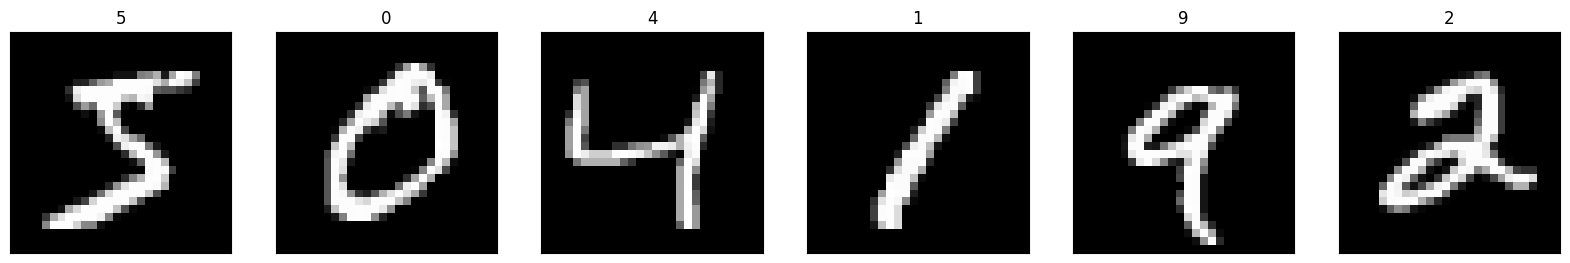

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

- View and image in More Detail

1.0


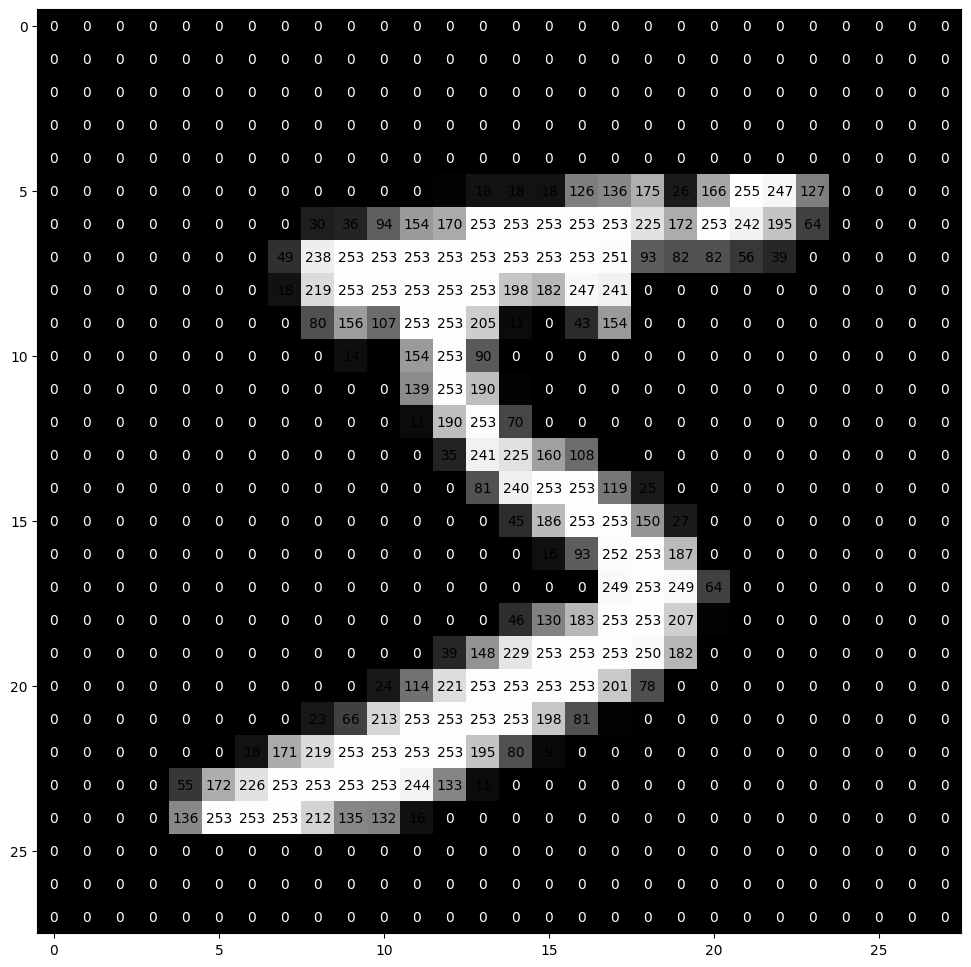

In [ ]:
def visualze_input(img,ax):
    ax.imshow(img,cmap='gray')
    width,height = img.shape
    thresh = img.max()/255
    print(thresh)
    for x in range(width):
        for y in range(height):
             ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
visualze_input(X_train[0],ax)

- Preprocess input images : Rescale the Images by Dividing Every Pixel in Every image by 255

In [ ]:
#normalize the data to accelerate learning
mean = np.mean(X_train)
std = np.std(X_train)
X_train =(X_train-mean)/(std+1e-7)
X_test =(X_test-mean)/(std+1e-7)

print('X_train shape :', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0],'test_samples')

X_train shape : (60000, 28, 28)
60000 train samples
10000 test_samples


- Preprocess the labels : Encode Categorical Integer Lables Using a Ont-hot Scheme

In [ ]:
from keras.utils import np_utils

num_classes = 10
print('Integer-values labels:')
print(y_train[:10])

#one-hot encoding the labels
#convert class vector to binary classd matrices
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

print('Ont-hot lables:')
print(y_train[:10])

Integer-values labels:
[5 0 4 1 9 2 1 3 1 4]
Ont-hot lables:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


- Reshape data to fit out CNN(and input_shape)

In [ ]:
#input image dimension 28X28 pixel images
img_rows,img_cols = 28,28

X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1) #(batch,width,height,channel)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
input_shape = (img_rows,img_cols,1)

print('image input shape:',input_shape)
print('X_train shape:',X_train.shape)

image input shape: (28, 28, 1)
X_train shape: (60000, 28, 28, 1)


- Define the Model Architecture

 <img src='https://github.com/moelgendy/deep_learning_for_vision_systems/raw/2c9d077b43003657cd8f6d5ddfb6f83ee8bae1f3/chapter_05/images/lenet_architecture.png'>

 - 32X32가 아니라 28X28임 (현재 MINST를 하는중)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D, Flatten,Dense

model = Sequential() #비어 있는 순차형 모델 객체 생성

#합성곱층 C1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh',input_shape=(28,28,1),padding="same"))

#풀링층 S2
model.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

#합성곱층 C3
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh',padding="valid"))

#풀링층 S4
model.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

#합성곱층 C5
model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh',padding="valid"))

model.add(Flatten())

#완전연결망 FC6
model.add(Dense(units=84, activation='tanh'))

#softmax를 활성화 함수로 사용하는 출력층 FC7
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_22 (Conv2D)          (None, 1, 1, 120)         48120     
                                                                 
 flatten_7 (Flatten)         (None, 120)              

- Compile the Model

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

- Train the Model

LeCun and his team used scheduled decay learning where the value of the learning rate was decreased using the following schedule: 0.0005 for the first two epochs, 0.0002 for the next three epochs, 0.00005 for the next four, and then 0.00001 thereafter. In the paper, the authors trained their network for 20 epochs.

- Scheduler 참고 : https://lcyking.tistory.com/87

In [ ]:
from keras.callbacks import ModelCheckpoint,LearningRateScheduler

#Set the learning rate schedule as oreated in the original paper
def lr_schedule(epoch):
    if epoch<=2:
        lr=5e-4
    elif epoch>2 and epoch<=5:
        lr=2e-4
    elif epoch>5 and epoch<=9:
        lr=5e-5
    else:
        lr=1e-5
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

#Set the checkpointer
checkpoint = ModelCheckpoint(filepath = 'model.weights.best.hdf5',verbose=1,save_best_only=True)
# Hierarchical Data Format 는 매우 크고 복잡한 대용량 데이터를 저장하기 위한 파일 형식(HDF4, HDF5)
#train the model
hist = model.fit(X_train,y_train,batch_size=32, epochs=20,validation_data=(X_test,y_test),
                 callbacks = [checkpoint,lr_scheduler],verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.09153, saving model to model.weights.best.hdf5
1875/1875 - 6s - loss: 0.2401 - accuracy: 0.9295 - val_loss: 0.0915 - val_accuracy: 0.9728 - lr: 5.0000e-04 - 6s/epoch - 3ms/step
Epoch 2/20

Epoch 2: val_loss improved from 0.09153 to 0.06235, saving model to model.weights.best.hdf5
1875/1875 - 5s - loss: 0.0767 - accuracy: 0.9765 - val_loss: 0.0623 - val_accuracy: 0.9810 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 3/20

Epoch 3: val_loss improved from 0.06235 to 0.05619, saving model to model.weights.best.hdf5
1875/1875 - 5s - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0562 - val_accuracy: 0.9815 - lr: 5.0000e-04 - 5s/epoch - 3ms/step
Epoch 4/20

Epoch 4: val_loss improved from 0.05619 to 0.03690, saving model to model.weights.best.hdf5
1875/1875 - 5s - loss: 0.0324 - accuracy: 0.9904 - val_loss: 0.0369 - val_accuracy: 0.9871 - lr: 2.0000e-04 - 5s/epoch - 3ms/step
Epoch 5/20

Epoch 5: val_loss did not improve from 0.03690
1875/1875

- Load model with Best Classification Accuracy on the Validation set

In [ ]:
from tensorflow import keras

model = keras.models.load_model('/content/model.weights.best.hdf5')

In [ ]:
score = model.evaluate(X_test,y_test,verbose=0)
accuracy=100*score[1]
print('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 99.0200%


- evaluate the model

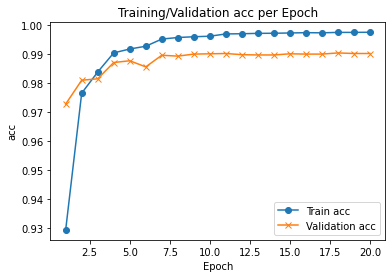

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

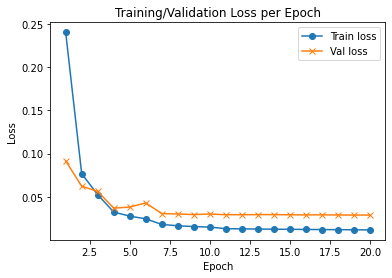

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

# CIFAR-10

발음을 조심해야하는 이름을 가진 CIFAR-10 dataset은 32x32픽셀의 60000개 컬러이미지가 포함되어있으며, 각 이미지는 10개의 클래스로 라벨링이 되어있습니다.
또한, MNIST와 같이 머신러닝 연구에 가장 널리 사용되는 dataset중 하나입니다.

<figure>
<img src='https://user-images.githubusercontent.com/15958325/63308580-41b7fe80-c32e-11e9-827f-98052675c0ea.png'>
</figure>

<img src='https://user-images.githubusercontent.com/15958325/63317956-c23b2700-c34f-11e9-82c2-6a40787579ec.png'>
</figure>

<img src='https://user-images.githubusercontent.com/15958325/63318014-f0206b80-c34f-11e9-9321-a1959b48b7fe.png'>
</figure>

### Train on CIFAR-10 dataset

load CIFAR 10 dataset

- CIFAR-10은 총 10개의 레이블로 이루어진 6만장의 이미지를 가지고 있으며 5만장은 트레이닝, 1만장은 테스트 용도로 쓰입니다. 해당 데이터셋은 http://www.cs.toronto.edu/~kriz/cifar.html 에서 다운로드 받으실 수 있습니다.

The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

In [ ]:
# 사용할 라이브러리 불러오기
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10#, mnist
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# CNN 및 MLP에 필요한 각 층들
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# 드롭아웃 적용을 위한 층
from keras.layers import Dropout
# 배치 정규화 적용을 위한 층
from keras.layers import BatchNormalization
# L2 정규화를 위한 라이브러리
from keras.regularizers import l2
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow

170498071/170498071 [==============================] - 11s 0us/step
x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


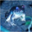

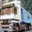

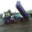

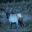

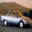

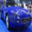

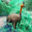

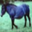

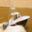

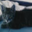

In [ ]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [ ]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


In [ ]:
num_classes=10
input_shape=(32,32,3)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,AveragePooling2D, Flatten,Dense

model = Sequential() #비어 있는 순차형 모델 객체 생성

#합성곱층 C1
model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh',input_shape=input_shape,padding="SAME"))

#풀링층 S2
model.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

#합성곱층 C3
model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh',padding="valid"))

#풀링층 S4
model.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

#합성곱층 C5
model.add(Conv2D(filters=120, kernel_size=5, strides=1, activation='tanh',padding="valid"))

model.add(Flatten())

#완전연결망 FC6
model.add(Dense(units=84, activation='tanh'))

#softmax를 활성화 함수로 사용하는 출력층 FC7
model.add(Dense(units=10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

- keras의 callback함수.
 - ModelCheckpoint : 모든 epoch마다 모델을 저장하는 것은 비효율적이니, validation set이 기존의 최고 성능 모델에 비해 낮아질때만 저장되도록 설정.

 - EarlyStopping : 딥러닝 모델이 과적합되기 시작하면 점점 새로운 데이터에서의 예측 성능이 신뢰하기 어려워지기 때문에 학습을 진행하다가 검증 세트에서의 손실이 더 이상 감소하지 않으면 학습을 중단하는 방법을 사용할 수 있음. 케라스에서는 이를 위해 EarlyStopping이라는 콜백(Callback) 함수를 제공.

 - callback : 특정 조건에서 자동으로 실행되는 함수.

 - 먼저 모니터링할 지표와 몇번의 에포크를 기다리고 조기 종료할지를 각각 monitor 파라미터와 patience파라미터를 통해 지정해서 EarlyStopping객체를 생성. 그 다음 fit메서드의 callback 하이퍼 파리미터에 리스트 형태로 조금 전 생성한 EarlyStopping 객체를 전달해주면 간단히 콜백 함수가 적용이 됨.


- 학습률은 가장 중요한 하이퍼파라미터로, 항상 잘 조정되어 있어야 한다. 단 하나의 하이퍼파라미터를 조정할 시간 밖에 주어지지 않는다면, 학습률을 조정해야 한다. -> 요수아 벤지오

In [ ]:
from keras.callbacks import ModelCheckpoint,LearningRateScheduler,EarlyStopping

#Set the learning rate schedule as oreated in the original paper
def lr_schedule(epoch):
    if epoch<=2:
        lr=5e-4
    elif epoch>2 and epoch<=5:
        lr=2e-4
    elif epoch>5 and epoch<=9:
        lr=5e-5
    else:
        lr=1e-5
    return lr
lr_scheduler = LearningRateScheduler(lr_schedule)

early_stopping = EarlyStopping(monitor='val_loss',patience=2)

#Set the checkpointer
checkpoint = ModelCheckpoint(filepath = 'model.weights.best.hdf5',verbose=1,save_best_only=True)

#train the model
hist = model.fit(x_train,y_train,batch_size=32, epochs=20,validation_data=(x_test,y_test),
                 callbacks = [checkpoint,lr_scheduler,early_stopping],verbose=2,shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.70699, saving model to model.weights.best.hdf5
1563/1563 - 38s - loss: 1.7933 - accuracy: 0.3657 - val_loss: 1.7070 - val_accuracy: 0.4054 - lr: 5.0000e-04 - 38s/epoch - 24ms/step
Epoch 2/20

Epoch 2: val_loss improved from 1.70699 to 1.55892, saving model to model.weights.best.hdf5
1563/1563 - 33s - loss: 1.6164 - accuracy: 0.4322 - val_loss: 1.5589 - val_accuracy: 0.4519 - lr: 5.0000e-04 - 33s/epoch - 21ms/step
Epoch 3/20

Epoch 3: val_loss improved from 1.55892 to 1.48488, saving model to model.weights.best.hdf5
1563/1563 - 31s - loss: 1.4996 - accuracy: 0.4730 - val_loss: 1.4849 - val_accuracy: 0.4736 - lr: 5.0000e-04 - 31s/epoch - 20ms/step
Epoch 4/20

Epoch 4: val_loss improved from 1.48488 to 1.42238, saving model to model.weights.best.hdf5
1563/1563 - 32s - loss: 1.4027 - accuracy: 0.5065 - val_loss: 1.4224 - val_accuracy: 0.4969 - lr: 2.0000e-04 - 32s/epoch - 21ms/step
Epoch 5/20

Epoch 5: val_loss improved from 1.42238 to 1

- Load model with Best Classification Accuracy on the Validation set

In [ ]:
score = model.evaluate(x_test,y_test,verbose=0)
accuracy=100*score[1]
print('Test accuracy: %.4f%%' %accuracy)

Test accuracy: 53.0200%


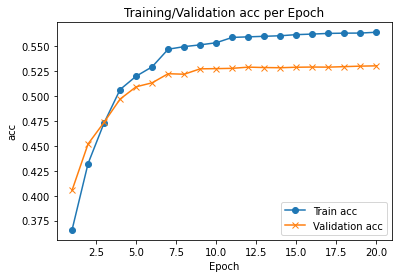

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train acc', 'Validation acc'], loc = 0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')
plt.show()

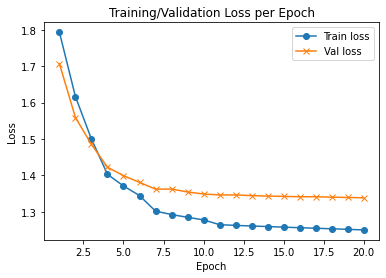

In [ ]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['loss'], 'o-')
ax.plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax.legend(['Train loss', "Val loss"], loc = 0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()